# Chapter 8. Logistics Regression
## CPE 490 590 
## Rahul bhadani

Logistics regression establishes the numerical relationship between two variables (predictor and response). The response is assumed to be binary (either 0 or 1, or -1 and 1)

### Logistics Regression is a supervised classification problem.

## Assumptions about Logistics Regression
1. Linearity: Logistics regression fits a logistics curve to a binary data. The cuve can be interpreted as the probability associated with each outcome across independent variable values. Logistics regression assume that the relationship between natural log of these probabilities (when expressed as odds) and your predictor variable is linear.
2. No Outliers: Logistics regression is very sensisitve to outliers.
3. Independence: Each observation point should be independent of each other.

# Let's generate some synthetic data to work on

In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x = np.reshape(x, (12, 1))
y = [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
y = np.reshape(y, (12, 1))

2025-02-10 14:30:13.064211: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-10 14:30:14.189875: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


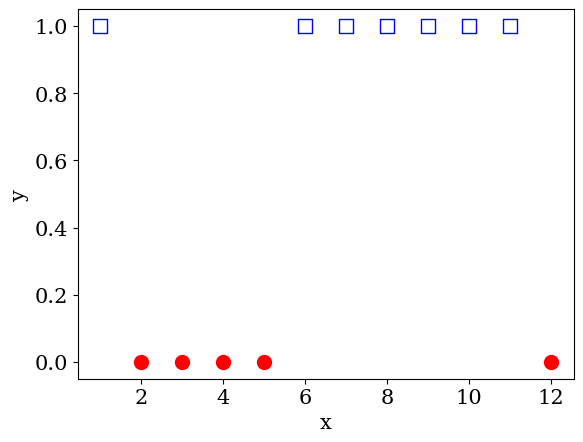

In [5]:
# Create scatter plot
for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i], y[i], color='red', s=100)
    else:
        plt.scatter(x[i], y[i], color='blue', s=100, marker='s', facecolors='none')

plt.xlabel('x')
plt.ylabel('y')
plt.savefig('../figures/scatterplot_logistics_sample_data.pdf', format='pdf', bbox_inches='tight')
plt.show()


 Clearly, distinguishing red and blue points won't work if we use the Linear Regression method. Also, linear regression predicts a continuous value, hence it won't be able to predict either 0 or 1.

# Logistics Regression
## Sigmoid Function / Logistics Function

By looking at the data above, we think we can classify or correctly label the data points if we have a function that is low (0) for some low values of $x$, and high (1)for some values of $x$.
One such function is **Sigmoid Function** or **Logistics Function**.

$$
g(z) = \cfrac{1}{1 + e^{-z}}
$$

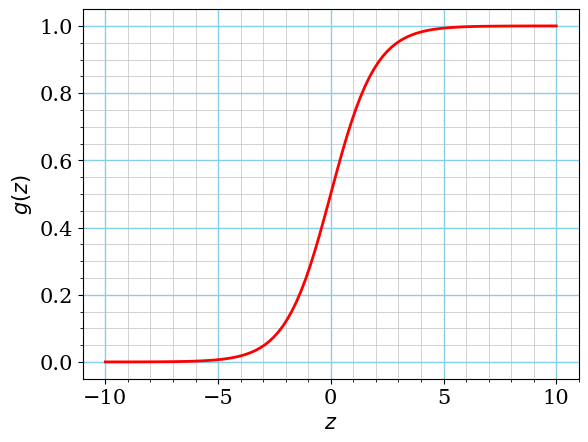

In [7]:
z = np.linspace(-10.0, 10.0, 100)
gz = 1.0/(1 + np.exp(-z))
plt.plot(z, gz, linewidth = 2, color='red')
plt.xlabel('$z$')
plt.ylabel('$g(z)$')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='silver')
plt.grid(which='major', linestyle='-', linewidth='1.0', color='skyblue')
plt.savefig('../figures/ssigmoid_function.pdf', format='pdf', bbox_inches='tight')

plt.show()


From the above, we see that

$$
\lim_{z\to-\infty} g(z) = 0
$$

and 

$$
\lim_{z\to\infty} g(z) = 1
$$

It means, for a very high positive value of $x$, the function approaches $1$, and for a very high negative value of $x$, the function approaches $0$.

## Generalized Sigmoid/Logistics Function
But hey, data $x$ are all positive. So what do we do then?

Can we somehow modify $g(z)$ function using some transformation techniques we studied in Signals \& Systems class?


What if we have some parameter $a$ so that we get $g(z - a)$?

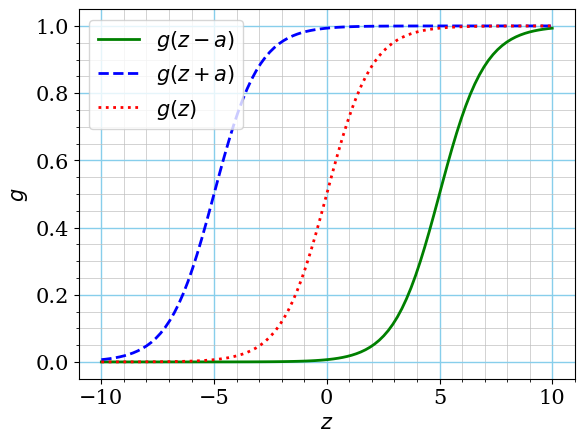

In [8]:
z = np.linspace(-10.0, 10.0, 100)
a = 5.0
gz2 = 1.0/(1 + np.exp(-(z-a)))
gz3 = 1.0/(1 + np.exp(-(z+a)))
plt.plot(z, gz2, linewidth = 2, color='green', label='$g(z-a)$')
plt.plot(z, gz3, linewidth = 2, color='blue', label='$g(z+a)$', linestyle='--')
plt.plot(z, gz, linewidth = 2, color='red', label='$g(z)$', linestyle=':')
plt.xlabel('$z$')
plt.ylabel('$g$')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='silver')
plt.grid(which='major', linestyle='-', linewidth='1.0', color='skyblue')
plt.legend()
plt.savefig('../figures/ssigmoid_function_3.pdf', format='pdf', bbox_inches='tight')
plt.show()


Now, what if we want the slope to change faster or slower? How should we modify the Sigmoid function?

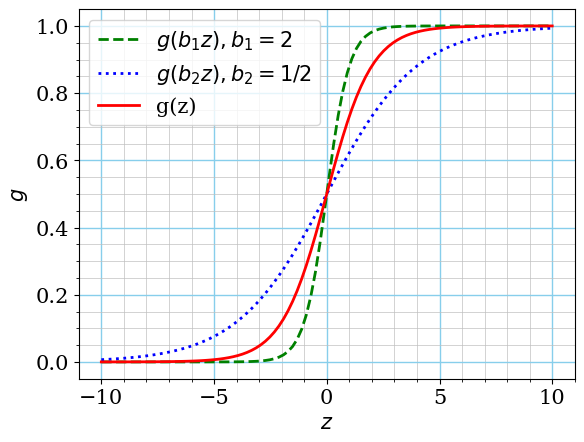

In [9]:
z = np.linspace(-10.0, 10.0, 100)
b1 = 2.0
b2 = 1/2.0
gz = 1.0/(1 + np.exp(-z))
gz2 = 1.0/(1 + np.exp(-z*b1))
gz3 = 1.0/(1 + np.exp(-z*b2))
plt.plot(z, gz2, linewidth = 2, color='green', label='$g(b_1 z), b_1 = 2$',linestyle='--')
plt.plot(z, gz3, linewidth = 2, color='blue', label='$g(b_2 z), b_2 = 1/2$', linestyle=':')
plt.plot(z, gz, linewidth = 2, color='red', label='g(z)')
plt.xlabel('$z$')
plt.ylabel('$g$')
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='silver')
plt.grid(which='major', linestyle='-', linewidth='1.0', color='skyblue')
plt.legend()
plt.savefig('../figures/sigmoid_function_varying_slope.pdf', format='pdf', bbox_inches='tight')
plt.show()


In the above example $b_1$, $b_2$ and $\pm a$ are learnable parameters that we are going to learn from data the same way we learned $w_1$ and $w_0$ in the linear regression.
Thus, we consider a parameter vector $\boldsymbol{\theta}$ that consists of a vector of parameters to be learned using data $\textbf{x}$ that we can use to write a generalized version of sigmoid that is data-dependent by setting $z = \boldsymbol{\theta}^\top\textbf{x} $

$$
h_{\boldsymbol{\theta}}(\textbf{x}) = g(\boldsymbol{\theta}^\top\textbf{x} ) = \cfrac{1}{1 + e^{-\boldsymbol{\theta}^\top\textbf{x}}}
$$


Here, the overall goal becomes finding $P(Y|X)$, which is given information about the random variable $X$ that gives the distribution of the predictor variable, finding the probability that the random variable $Y$  takes a certain value.

In the above formulation, $h_{\boldsymbol{\theta}}$ estimates the probability that the data points belong $Y = 1$, and hence we can write it as

$$
P(Y = 1 | X = x) = h_{\boldsymbol{\theta}}(\textbf{x}) 
$$

$$
P(Y = 0 | X = x) = 1-  h_{\boldsymbol{\theta}}(\textbf{x})
$$

# Cost Function for Logistics Regression
Just like linear regression, we need a cost function based on which we want to estimate $\boldsymbol{\theta}$.

Here, we have two scenarios:

### $y_i = 1$:

#### if $h_{\boldsymbol{\theta}}(\textbf{x})  \approx 1$, cost $\approx 0$ (no penalty)
#### if $h_{\boldsymbol{\theta}}(\textbf{x})  \approx 0$, cost $\approx$ very high



### $y_i = 0$:

#### if $h_{\boldsymbol{\theta}}(\textbf{x})  \approx 1$, cost $\approx $ very high
#### if $h_{\boldsymbol{\theta}}(\textbf{x})  \approx 0$, cost $\approx 0$ (no penalty)

Then as the outcome is 0 or 1, it follows the Bernoulli Distribution (The Bernoulli distribution is a special case of the binomial distribution where a single trial is conducted (so n would be 1 for such a binomial distribution).


 The formula for pmf associated with a Bernoulli random variable over possible outcomes $x$ is given as follows:

$$
f(x; p) =  \begin{cases} p &\quad \textrm{~if~} x= 1 \\ 1- p &\quad \textrm{~if~} x= 0 \end{cases}

$$
We can also express this formula as,

$$
f(x, p) = p^x(1 - p)^{1 - x},\quad x \in \{0, 1\}
$$


so, the probability of assigning a label $y$ based on the data $\mathbf{x}$ is given by

$$
P(Y = y| X = \mathbf{x}) =  h_{\boldsymbol{\theta}}(\textbf{x})^y \bigg[ 1 - h_{\boldsymbol{\theta}}(\textbf{x}) \bigg]^{(1-y)}
$$

Now, we write taking all data into account (all data points are independent):

$$
L(\theta) = \Pi_{i=1}^n P(Y = y_i| X = \mathbf{x}_i) = \Pi_{i=1}^n h_{\boldsymbol{\theta}}(\textbf{x}_i)^{y_i} \bigg[ 1 - h_{\boldsymbol{\theta}}(\textbf{x}_i) \bigg]^{(1-y_i)}
$$

This is called **likelihood function**.

Now, take the log of the likelihood function, which is called the log-likelihood function:
$$
LL(\boldsymbol{\theta}) = \sum_{i=1}^n y_i \log ({ h_{\boldsymbol{\theta}}(\textbf{x}_i) }) + (1-y_i)\log \bigg[ 1 - h_{\boldsymbol{\theta}}(\textbf{x}_i) \bigg]
$$

# The Cost Function
In the logistics regression, our goal becomes maximizing the log-likelihood by choosing the appropriate $\boldsymbol{\theta}$.
For this, we take the partial derivative of $LL(\theta)$ with respect to  $\boldsymbol{\theta}$.

$$
\cfrac{\partial LL(\boldsymbol{\theta})}{\partial \theta_j} = \sum_{i=1}^n \bigg[ y_i - h_{\boldsymbol{\theta}}(\textbf{x}_i) \bigg]x_{ij}
$$

The derivation comes from the fact that the logistics function has a special property:

$$
\cfrac{\partial g(z) }{\partial z} = g(z)[ 1 - g(z)]
$$

Equating $$\cfrac{\partial LL(\boldsymbol{\theta})}{\partial \theta_j}  = 0$$will give optimal $\theta_j^*$. However, the expression doesn't have any closed form, so we resort to using numerical methods for solving the optimization, and hence, in this case, we use **Gradient Ascent Optimization** which is equivalent to minimizing the negative of the log-likelihood function, for which we can use already discussed **Gradient Descent Optimization**.

$$
\theta_j \leftarrow \theta_j - \eta \cfrac{\partial LL(\boldsymbol{\theta})}{\partial \theta_j} 
$$

$$
\theta_j \leftarrow \theta_j - \eta \sum_{i=1}^n \bigg[ y_i - h_{\boldsymbol{\theta}}(\textbf{x}_i) \bigg]x_{ij}
$$

## Logistics Regression using Sklearn

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression()
logreg.fit(x, y.ravel())

# Predict
y_hat = logreg.predict(x)

print("Predictions:", y_hat)

Predictions: [0 0 0 0 1 1 1 1 1 1 1 1]


## Assessing the Logistics regression model

### Accuracy
Note that the example in this notebook is a very rudimentary example without the data being split into the training and test sets. So for an accuracy score, we just pass the original dataset. However, in practice, we need to split the data into the training and test sets and only use the test set for making assessment.

In [ ]:
logreg.score(x,y)

0.75

## Confusion Matrix
THe confusion matrix displays how many were classified correctly and incorrectly

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_hat)
print(confusion_matrix)

[[3 2]
 [1 6]]


## Precision, Recall, F-measure, Support

**True Positive (tp)**: Arpita has cancer. She takes a medical test for cancer, and the test result is positive. This is a true positive because the test correctly identified that Arpita has cancer.

**True Negative (tn)**: Fatima does not have cancer. She takes the same medical test, and the test result is negative. This is a true negative because the test correctly identified that Fatima does not have cancer.

**False Positive (fp)**: Niu does not have cancer. However, when she takes the medical test, the test result is positive. This is a false positive because the test incorrectly identified that Niu has cancer.

**False Negative (fn)**: Diana has cancer. However, when she takes the medical test, the test result is negative. This is a false negative because the test incorrectly identified that Diana does not have cancer.


Precision is the ratio

$$
Precision = \cfrac{tp}{tp + fp}
$$
It is ability of the classifier to not label a sample as positive if it is negative.

Recall is

$$
Recall = \cfrac{tp}{tp + fn}
$$
It is ability of the classifier find all the positive samples.

**F-score** is weighted harmonic mean of the precision and recall.

$$
F_{score} = 2\times \cfrac{Precision \times Recall}{Precision + Recall}
$$

**Support** is the number of occurrences of each class in the test set.


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.75      0.86      0.80         7

    accuracy                           0.75        12
   macro avg       0.75      0.73      0.73        12
weighted avg       0.75      0.75      0.74        12



## ROC Curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate (TPR)
- False Positive Rate (FPR)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

### Classification Threshold

In the context of binary classification, the classification threshold is a value that determines the decision boundary of the predicted probabilities obtained from a model. If the predicted probability for a certain observation is above this threshold, the model classifies the observation as the positive class; if it’s below, the model classifies it as the negative class.

For example, in logistic regression, the default threshold is typically 0.5. If the predicted probability of an observation belonging to the positive class is greater than or equal to 0.5, the observation is classified as positive; otherwise, it’s classified as negative.

In a ROC curve, the classification threshold varies. Each point on the ROC curve represents a different threshold value, ranging from 0 to 1. Lowering the classification threshold classifies more items as positive, which increases both False Positives and True Positives.

The optimal threshold is the one that gives the best balance between True Positives and False Positives, depending on the specific context and the cost associated with misclassification. In some cases, such as when using ROC Curves, the best or optimal threshold for the classifier can be calculated directly. In other cases, it is possible to use a grid search to tune the threshold and locate the optimal value.

See more: http://navan.name/roc/

### Area Under the ROC Curve (AUC)
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1). AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

![Logit_AUC_ROC](figures/Logit_AUC_ROC.png)

AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is desirable for the following two reasons:

AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.
However, both these reasons come with caveats, which may limit the usefulness of AUC in certain use cases:

Scale invariance is not always desirable. For example, sometimes we really do need well calibrated probability outputs, and AUC won’t tell us about that.

Classification-threshold invariance is not always desirable. In cases where there are wide disparities in the cost of false negatives vs. false positives, it may be critical to minimize one type of classification error. For example, when doing email spam detection, you likely want to prioritize minimizing false positives (even if that results in a significant increase of false negatives). AUC isn't a useful metric for this type of optimization.

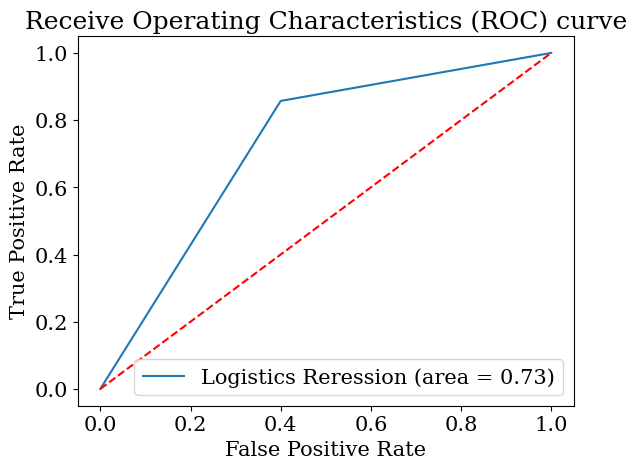

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y, y_hat)
fpr, tpr, threshold = roc_curve(y, y_hat)

plt.figure()
plt.plot(fpr, tpr, label='Logistics Reression (area = %0.2f)'% logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receive Operating Characteristics (ROC) curve')
plt.legend(loc='lower right')
plt.savefig('figures/ROC_Curve.pdf', format='pdf', bbox_inches='tight')

plt.show()

# 1. Logistics Regression on Iris Dataset

In [46]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# load dataset
Iris = pd.read_csv("https://raw.githubusercontent.com/rahulbhadani/CPE490_590_Sp2025/refs/heads/master/Data/Iris/iris.data")
Iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
X = Iris[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
Labels = Iris[["Class"]]

## Visualization

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Class'>

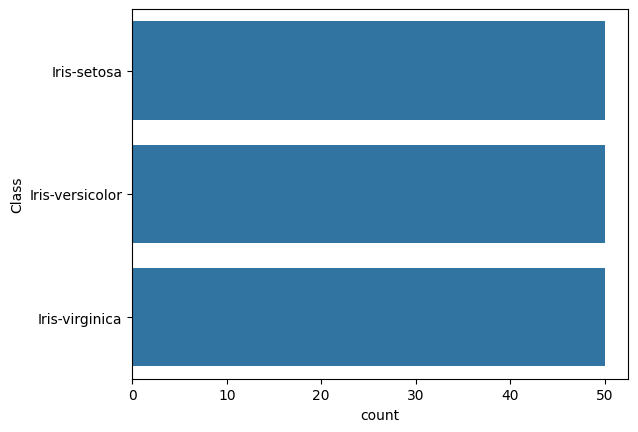

In [48]:
print(Iris["Class"].value_counts())
sns.countplot(Iris["Class"])

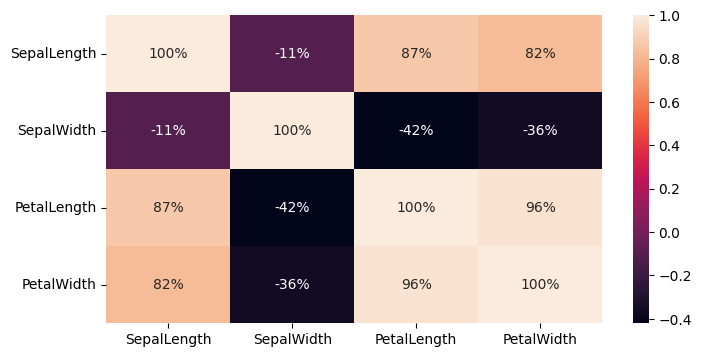

In [49]:
plt.figure(figsize=(8,4)) 
sns.heatmap(Iris[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]].corr(),annot=True,fmt=".0%") #draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

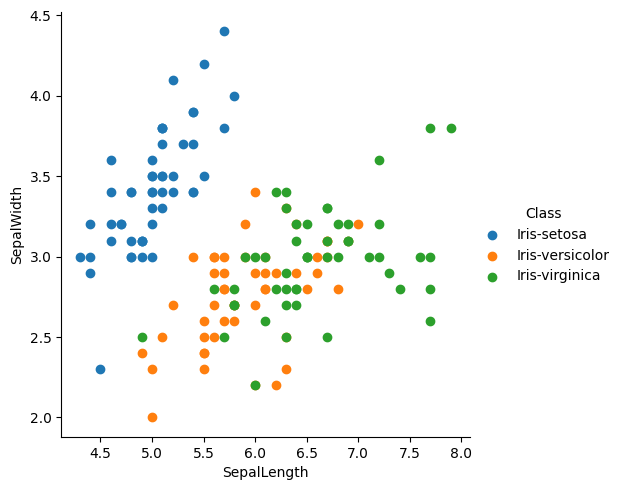

In [50]:
sns.FacetGrid(Iris, hue="Class", height=5).map(plt.scatter, "SepalLength", "SepalWidth").add_legend()

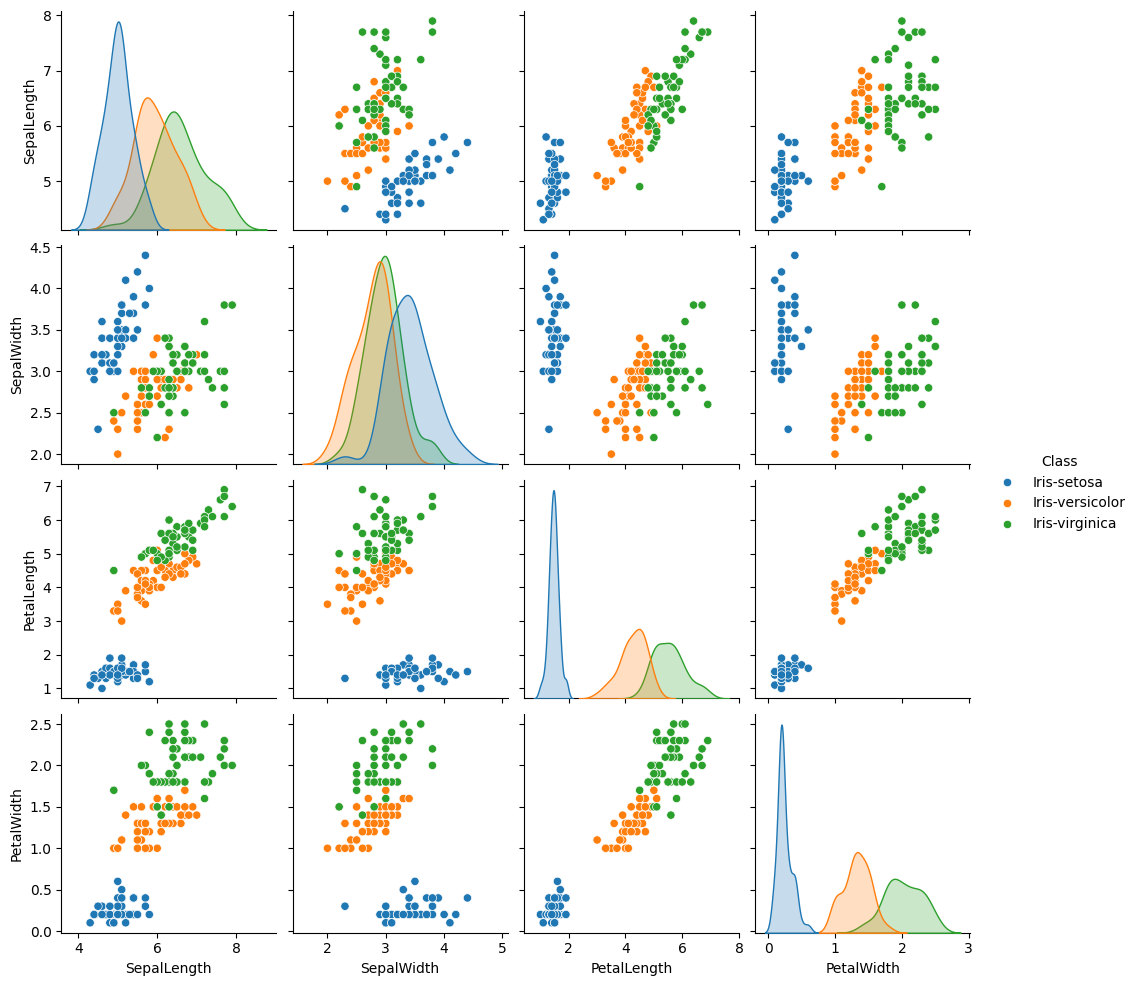

In [51]:
sns.pairplot(Iris.iloc[:,:],hue='Class') 

array([[<Axes: title={'center': 'PetalLength'}, xlabel='[Class]'>,
        <Axes: title={'center': 'PetalWidth'}, xlabel='[Class]'>],
       [<Axes: title={'center': 'SepalLength'}, xlabel='[Class]'>,
        <Axes: title={'center': 'SepalWidth'}, xlabel='[Class]'>]],
      dtype=object)

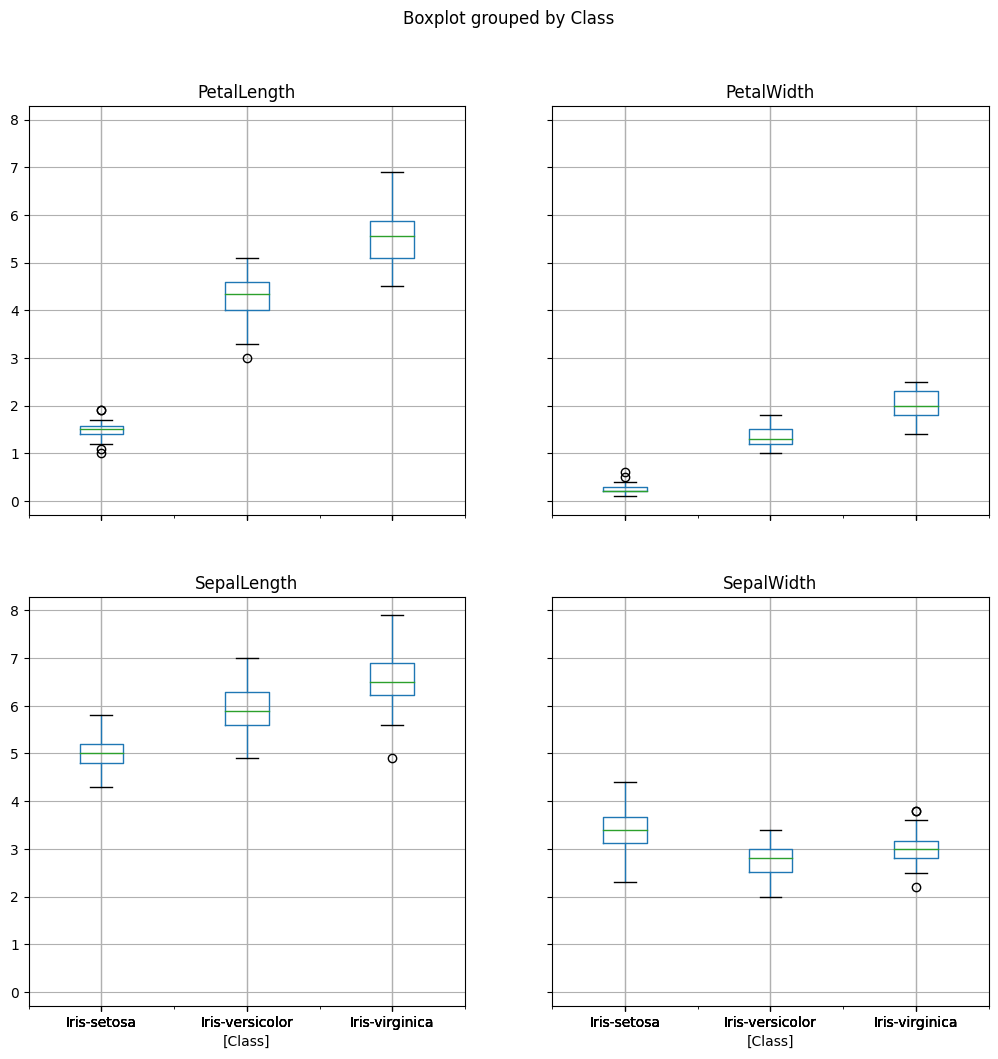

In [52]:
Iris.boxplot(by="Class", figsize=(12,12))

In [79]:
# Split the dataset into training and test sets
X_train, X_test, y_train_label, y_test_label = train_test_split(X, Labels, test_size=0.35, random_state=734)

In [80]:
# Standardize the features to have mean=0 and variance=1
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [81]:
# Reshape y_train and y_test to be 1D arrays
y_train_label = np.ravel(y_train_label)
y_test_label = np.ravel(y_test_label)

encoder = LabelEncoder()
encoder.fit(y_train_label)
y_train = encoder.transform(y_train_label)
y_test = encoder.transform(y_test_label)

In [82]:
np.unique(y_train_label)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [83]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn import metrics #for checking the model accuracy

In [84]:
log = LogisticRegression()
log.fit(X_train,y_train)
prediction=log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))


The accuracy of the Logistic Regression is 0.9433962264150944


In [85]:
y_train

array([0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0,
       2, 0, 0, 1, 0, 2, 1, 0, 2])

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[14  0  0]
 [ 0 18  2]
 [ 0  1 18]]


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      0.90      0.92        20
           2       0.90      0.95      0.92        19

    accuracy                           0.94        53
   macro avg       0.95      0.95      0.95        53
weighted avg       0.94      0.94      0.94        53



In [88]:
encoder.inverse_transform(prediction)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virgi